In [16]:
#Given an array of integers heights representing the histogram's bar height where the width of each bar is 1, 
#return the area of the largest rectangle in the histogram.

#second best solution
class Solution(object):
    def largestRectangleArea(self, heights):
        """
        :type heights: List[int]
        :rtype: int
        """
        length = len(heights)
        stack= [] # to save the index of the nearest bar on the left side whose height = a certain value
        l = [] # for each heights[il, look for and  save (1 + the index of the nearest bar on the left side whose height < heights[i])
        for i,h in enumerate(heights):
            while(stack and heights[stack[-1]]>=h):
                stack.pop()
            if(stack):
                l.append(stack[-1]+1)
            else:
                l.append(0)
            stack.append(i)
        
        # iterate from right side
        stack = []
        for i,h in reversed(list(enumerate(heights))):
            while(stack and heights[stack[-1]]>=h):
                stack.pop()
            if(stack):
                l[i] = ((stack[-1] - 1) - l[i] + 1 )*h
            else:
                l[i] = ((length - 1) - l[i] + 1)*h
            stack.append(i)

        return max(l)
    
s = Solution()
s.largestRectangleArea([2,1,5,6,2,3])


# Best Solution
class Solution1(object):
    def largestRectangleArea(self, heights):
        """
        :type heights: List[int]
        :rtype: int
        """
        stack = []
        max_area = 0
        for i, h in enumerate(heights):
            while stack and h < heights[stack[-1]]:
                # pop out all the heights larger than the current height to find the furthest bar
                # calculate the area at each index when they're poped out
                height = heights[stack.pop()] 
                # the stack will be a monotonic increasing stack so the width will be (i - 1) - (stack[-1] + 1) + 1
                width = i if not stack else i - stack[-1] - 1
                max_area = max(max_area, height * width)

            stack.append(i)

        # For the indices which are not poped out, the furthest bar on the right side will be heights[-1]
        # and the furthest bar on the left side will be (stack[-1] + 1) after they're poped out
        while stack:
            height = heights[stack.pop()]
            width = len(heights) if not stack else len(heights) - stack[-1] - 1
            max_area = max(max_area, height * width)

        return max_area




10

In [17]:
s = Solution()
s.largestRectangleArea([4,2,0,3,2,4,3,4])

10

<BarContainer object of 8 artists>

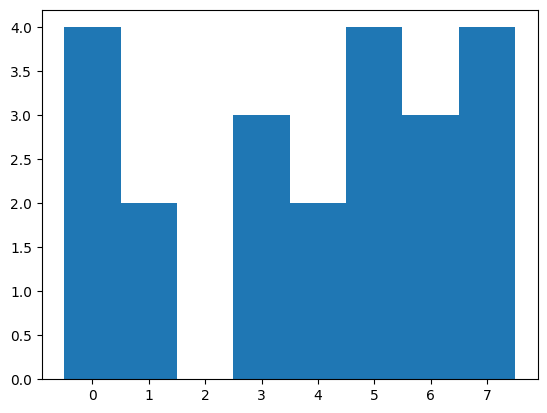

In [18]:
import matplotlib.pyplot as plt
plt.bar([0,1,2,3,4,5,6,7],[4,2,0,3,2,4,3,4],width=1)